<a href="https://colab.research.google.com/github/taniajasmin/Image-Transformations/blob/main/Sepia_and_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install opencv-python-headless

In [ ]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
# from google.colab import files
# files.upload()

print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving maned_wolf.jpg to maned_wolf (2).jpg


Uploaded Image:


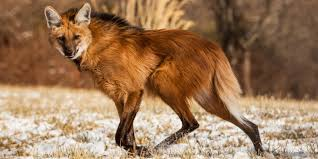

In [ ]:
image_filename = next(iter(uploaded))
image = cv2.imread(image_filename)

print("Uploaded Image:")
cv2_imshow(image)

Sepia effect

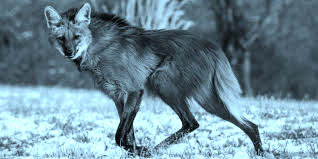

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Sepia transformation matrix
sepia_matrix = np.array([[0.393, 0.769, 0.189],
                         [0.349, 0.686, 0.168],
                         [0.272, 0.534, 0.131]])

# Apply sepia filter
sepia_image = cv2.transform(image, sepia_matrix)

# Clip values to [0, 255]
sepia_image = np.clip(sepia_image, 0, 255)

# Save and display
cv2.imwrite("sepia_output.jpg", sepia_image)
cv2_imshow(sepia_image.astype(np.uint8)) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # Remove cv2.waitKey and cv2.destroyAllWindows as they are not needed with cv2_imshow
# cv2.destroyAllWindows()

Edge detection

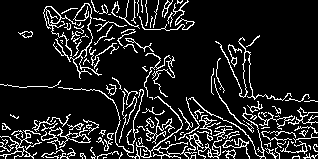

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, 50, 150)

# Save and display
cv2.imwrite("edges_output.jpg", edges)
# Replace cv2.imshow with cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow
cv2_imshow(edges)
# cv2.waitKey(0) # Remove, not needed with cv2_imshow
# cv2.destroyAllWindows() # Remove, not needed with cv2_imshow

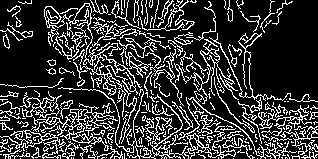

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur with a smaller kernel size
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Detect edges using Canny with adjusted thresholds
edges = cv2.Canny(blurred, 30, 100)  # Lowered thresholds for more edges

# Save and display
cv2.imwrite("edges_output.jpg", edges)
cv2_imshow(edges)

To label connected components (e.g., regions of the same color or intensity) and assign a unique number to each
1. Convert the image to grayscale.
2. Apply a threshold to create a binary image (if needed).
3. Use cv2.connectedComponents() to label connected regions.
4. Overlay the labels (numbers) on the original image.

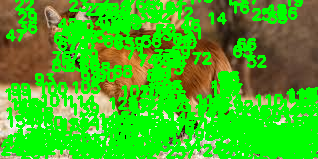

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, 30, 100)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(edges, connectivity=8)

# Create an output image to display the labels
output = image.copy()

# Loop through each connected component (skip background, label 0)
for i in range(1, num_labels):
    # Get the centroid of the component
    x, y = int(centroids[i][0]), int(centroids[i][1])

    # Draw the label number on the image
    cv2.putText(output, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save and display
cv2.imwrite("labeled_output.jpg", output)
cv2_imshow(output)

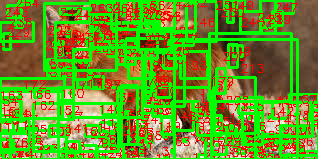

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, 30, 100)

# Find contours of the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an output image to display the labeled boxes
output = image.copy()

# Loop through each contour and label it
for i, contour in enumerate(contours):
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw the bounding box (optional)
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate the center of the bounding box
    center_x = x + w // 2
    center_y = y + h // 2

    # Put the number inside the bounding box
    cv2.putText(output, str(i + 1), (center_x - 10, center_y + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

# Save and display
cv2.imwrite("labeled_boxes_output.jpg", output)
cv2_imshow(output)